In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

# Image compression

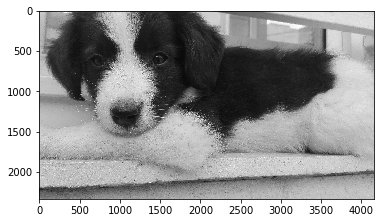

In [ ]:
image=imread('tedi.jpg') #reading the image
a=np.mean(image,-1) #grayscaling the image
img=plt.imshow(a)
img.set_cmap('gray')

In [ ]:
u,s,vt=np.linalg.svd(a) #svd decomposition of the image
s=np.diag(s)

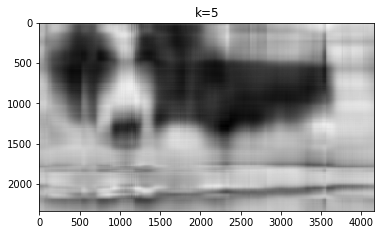

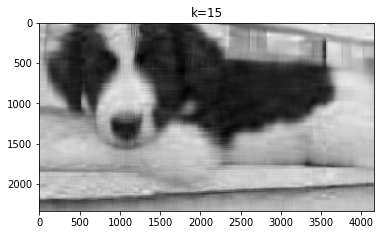

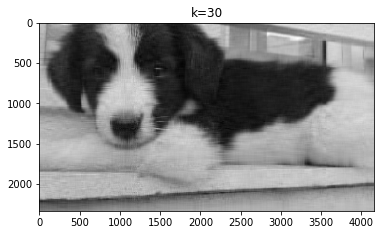

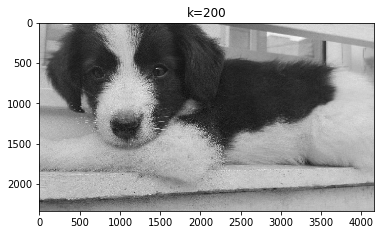

In [ ]:
j = 0
for k in [5, 15, 30, 200]:
    ak=u[:,:k]@s[0:k,:k]@vt[:k,:]
    plt.figure(j+1)
    img=plt.imshow(ak)
    img.set_cmap('gray')
    j+=1
    plt.title('k={}'.format(k))
    plt.show()

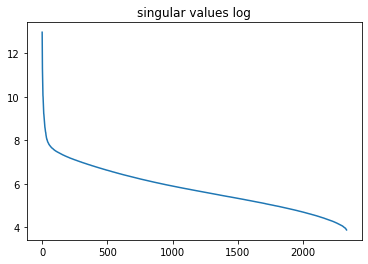

In [ ]:
sigma=np.diagonal(s)
sigma_log=[math.log(sig) for sig in sigma]
plt.plot(sigma_log) #shows the value of sigmas
plt.title('singular values log')
plt.show()

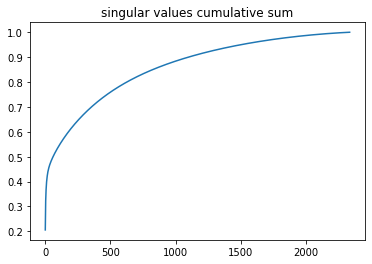

In [ ]:
plt.plot(np.cumsum(sigma)/np.sum(sigma)) #shows how much energy of the real matrix is kept or preserved
plt.title('singular values cumulative sum')
plt.show()

# noise reduction

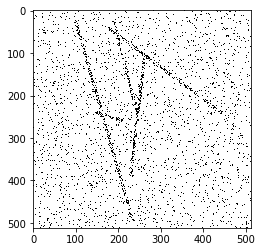

In [ ]:
image=imread('noisy.png') #reading the image
a=np.mean(image,-1) #grayscaling the image
img=plt.imshow(a)
img.set_cmap('gray')

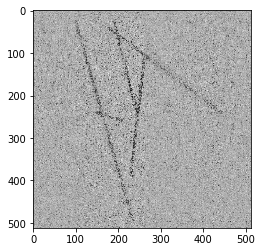

In [ ]:
u,s,vt=np.linalg.svd(a)
s=np.diag(s)
r=70
ar=u[:,:r]@s[0:r,:r]@vt[:r,:]
img=plt.imshow(ar)
img.set_cmap('gray')

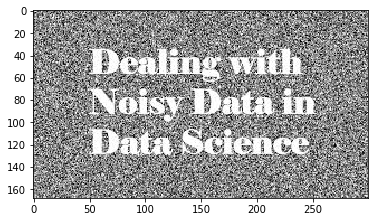

In [ ]:
image=imread('noisy_.jpg') #reading the image
a=np.mean(image,-1) #grayscaling the image
img=plt.imshow(a)
img.set_cmap('gray')

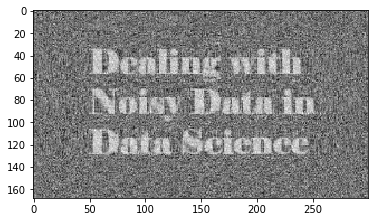

In [ ]:
u,s,vt=np.linalg.svd(a)
s=np.diag(s)
r=35
ar=u[:,:r]@s[0:r,:r]@vt[:r,:]
img=plt.imshow(ar)
img.set_cmap('gray')

## Linear regression

In [ ]:
#first we build ax=b 
x=3
a=np.arange(-2,2,0.25) #building vector a 
a=a.reshape(-1,1)
b=a*x+np.random.randn(*a.shape)

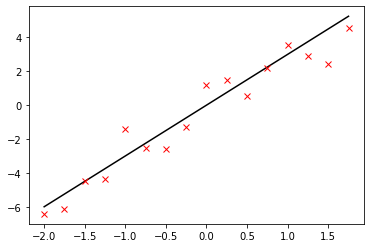

In [ ]:
plt.plot(a,x*a,color='k')
plt.plot(a,b,'x',color='r')

In [ ]:
u,s,vt=np.linalg.svd(a,full_matrices=False) #building a_prep from svd and then calculating x_tilda from it
s=np.diag(s)
x_tilda=vt.T @ np.linalg.inv(s) @ u.T @ b

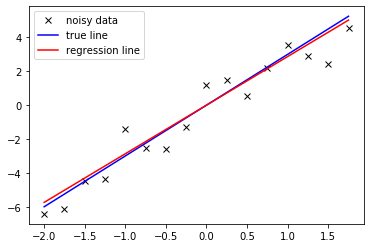

In [ ]:
plt.plot(a,b,'x',color='k',label='noisy data') 
plt.plot(a,x*a,color='b',label='true line')
plt.plot(a,x_tilda*a,color='r',label='regression line') #calculated line
plt.legend()

plt.show()

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston() #we load a dataset 
df = pd.DataFrame(boston.data,columns=boston.feature_names) #make a dataframe
df['Target'] = pd.Series(boston.target)

In [ ]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [ ]:
A=df.iloc[:,:-1]
A=A.to_numpy()
b=df.iloc[:,-1]
b=b.to_numpy()
u,s,vt=np.linalg.svd(A,full_matrices=0)
x_tilda= vt.T @ np.linalg.inv(np.diag(s)) @ u.T @ b

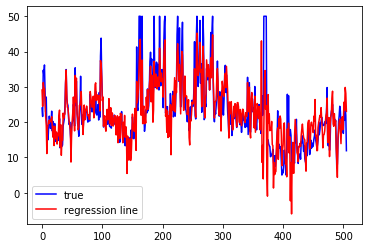

In [ ]:
plt.plot(b , color='b', label='true')
plt.plot(A @ x_tilda , color='r' , label='regression line')
plt.legend()
plt.show()

## PCA

In [ ]:
y_center=np.array([2,1]) #center of new data
theta=np.pi/3 #direction
sigma=np.array([2,0.5]) #magnitude
n=1000
x=np.random.randn(2,n) #random points as our data
r=np.array([[np.cos(theta),-np.sin(theta)],
            [np.sin(theta),np.cos(theta)]]) #permutation matrix

In [ ]:
r #direction of change

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [ ]:
sigma #magnitude of change

array([2. , 0.5])

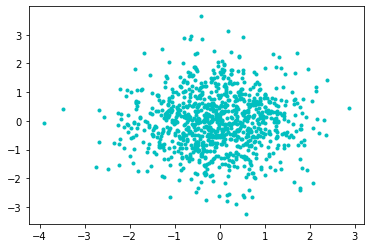

In [ ]:
plt.plot(x[0,:],x[1,:],'.',color='c')

In [ ]:
x= r @ np.diag(sigma) @ np.random.randn(2,n) + np.diag(y_center) @ np.ones((2,n)) #change the magnitude and direction of x and its center

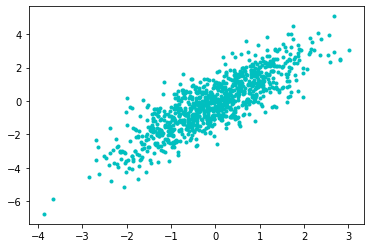

In [ ]:
plt.plot(y[0,:],y[1,:],'.',color='c')

In [ ]:
#pca for finding principal components
avg=np.mean(y,axis=1) 
avg_matrix=avg.reshape(-1,1) @ np.ones((1,n)) #averege matrix of changed data
B=y-avg_matrix #mean subtracted data
u,s,vt=np.linalg.svd(B/np.sqrt(n))

In [ ]:
u #shows the direction of change

array([[-0.4986344, -0.8668124],
       [-0.8668124,  0.4986344]])

In [ ]:
s #shows the magnitude of change 

array([1.87346997, 0.4970673 ])

In [ ]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
df = pd.DataFrame(bc.data,columns=bc.feature_names) #make a dataframe
df['Target'] = pd.Series(bc.target)
df['Target'].replace(0, 'Benign',inplace=True)
df['Target'].replace(1, 'Malignant',inplace=True)

In [ ]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign


In [ ]:
A=df.iloc[:,:-1]
A=A.to_numpy()
b=df.iloc[:,-1]
b=b.to_numpy()
u,s,vt=np.linalg.svd(A,full_matrices=0)

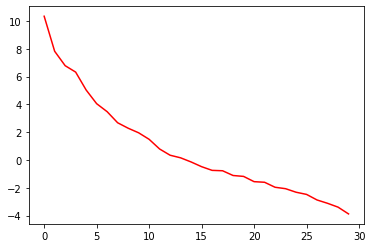

In [ ]:
log_s=[math.log(sigma) for sigma in s]
plt.plot(log_s,color='r')

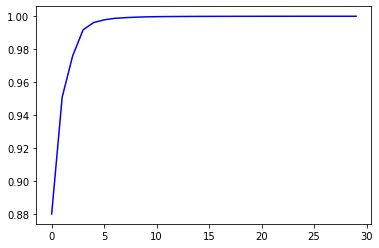

In [ ]:
plt.plot(np.cumsum(s)/np.sum(s),color='b')

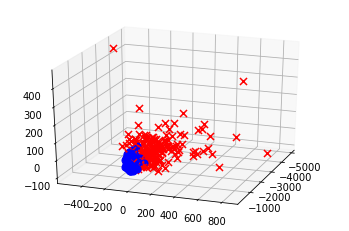

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(A.shape[0]):
    x = vt[0,:] @ A[j,:].T #first principal component
    y = vt[1,:] @ A[j,:].T #second principal component
    z = vt[2,:] @ A[j,:].T #third principal component
    
    if b[j] == 'Benign': 
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show() #as we see our data is classified well using pca

## eignfaces

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces() #load the dataset
imgs = data.images #400 grayscale images
print(imgs.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\manoto\scikit_learn_data
(400, 64, 64)


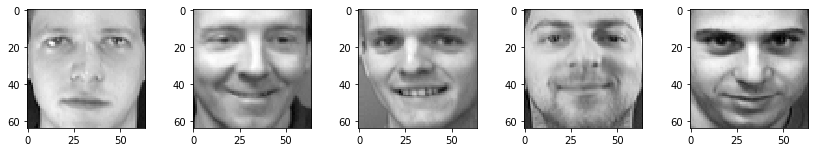

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)
for i in range(0, 5):
    axes[i].imshow(imgs[i*20], cmap='gray') #we show 5 photos
plt.show()

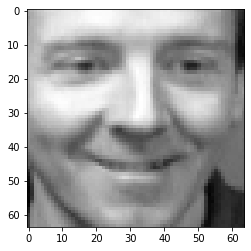

In [ ]:
M = imgs.reshape((-1, imgs.shape[1]*imgs.shape[2])).T #each column of M represents a flatten image

x= np.zeros((400, 1)) 
x[20, 0] = 1  #the 20th element of x is one .which will represent the 20th image of the matrix M
y = M @ x #the 20th image
plt.imshow(y.reshape((64,64)), cmap='gray') #reshaping the flatten image to its real size then showing it
plt.show()

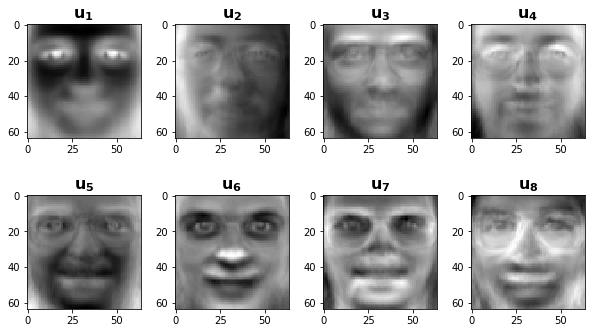

In [ ]:
u,s,vt=np.linalg.svd(M)
s=np.diag(s)
fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)
for i in range(0, 8):
    axes[i // 4, i % 4].imshow(u[:, i].reshape((64,64)),cmap='gray')
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)    #columns of u represent eingfaces
plt.show() #as we see each eignface represents an important feature of the face

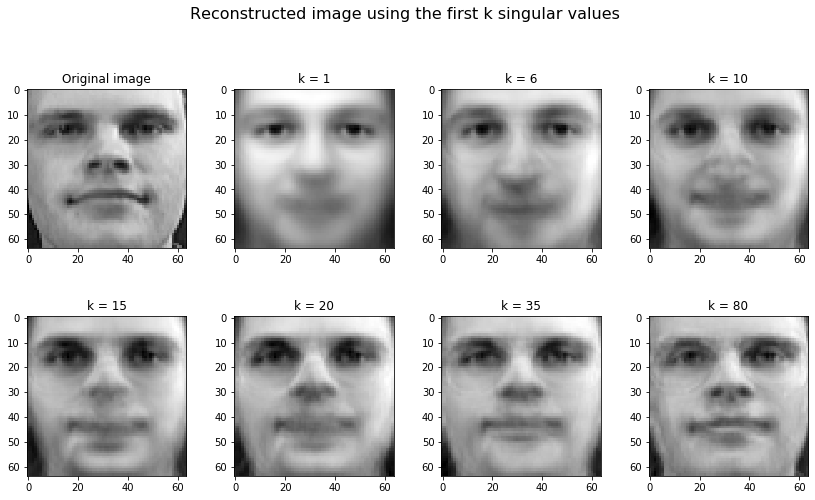

In [ ]:
y=np.zeros((400,1))
y[357,0]=1 #choosing the 357th image
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)
axes[0, 0].imshow(imgs[357], cmap='gray') #showing the original image
axes[0, 0].set_title("Original image")
k_list = [1, 6, 10, 15, 20, 35, 80]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1] 
    Mk = u[:, :k] @ s[:k, :k] @ vt[:k, :] @ y #approximation using svd

    axes[i // 4, i % 4].imshow(Mk.reshape((64,64)), cmap='gray') 
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()